# Assignment: Exploratory Data Analysis (note: i got an extension on this assignment
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/airbnb_hw.csv')

price = df['Price']
price = price.str.replace(',','')
price = pd.to_numeric(price,errors='coerce')
df['Price'] = price
del price

2

In [ ]:
print(df.shape)
df.head()

(30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
df.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

There are 13 variables and 30478 observations. Those variables are 'Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'

3

In [ ]:
pd.crosstab(df['Property Type'],df['Room Type'])

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


The majority of the properties are apartments, with the second most being houses, third being lofts, and fourth being condos. Most of the rest of the properties aren't commonly rented at all. For houses, renting private rooms is more common than renting the entire property.

4

<Axes: xlabel='Price', ylabel='Count'>

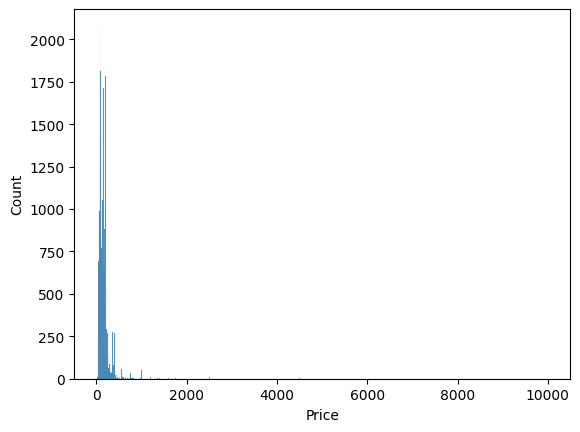

In [ ]:
import seaborn as sns
sns.histplot(data=df,x='Price')

<Axes: xlabel='Price', ylabel='Density'>

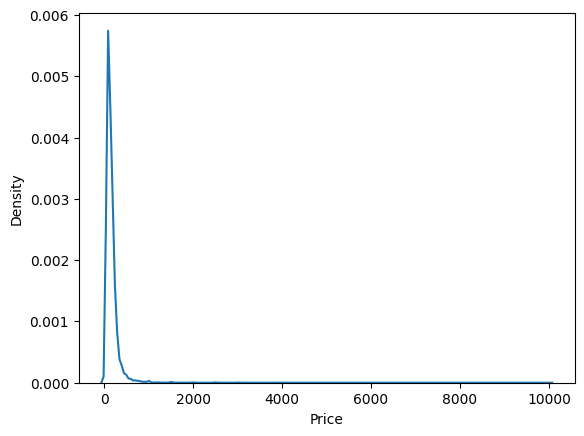

In [ ]:
sns.kdeplot(data=df,x='Price')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Price'>

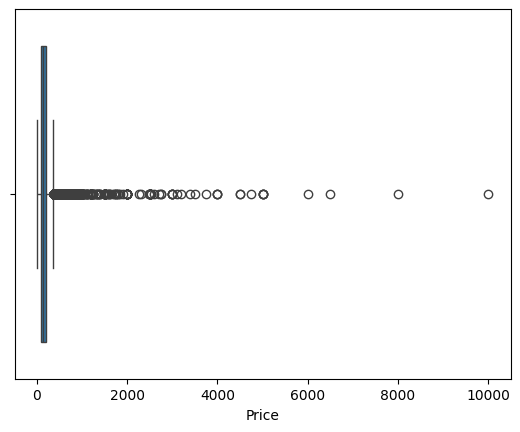

In [ ]:
sns.boxplot(data=df,x='Price')

In [ ]:
df['Price'].describe()

,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


<Axes: xlabel='Price_log', ylabel='Count'>

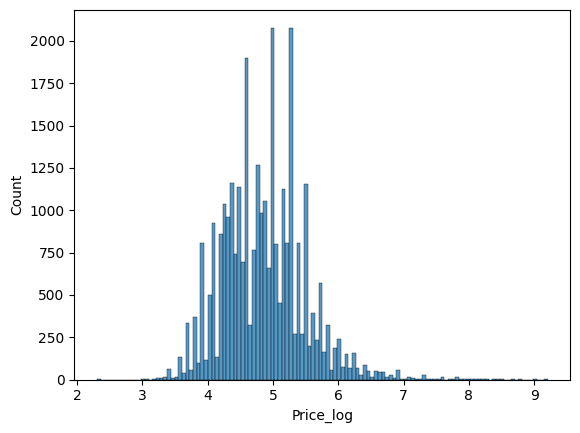

In [ ]:
df['Price_log'] = np.log(df['Price'])
sns.histplot(data=df,x='Price_log')


<Axes: xlabel='Price_log', ylabel='Density'>

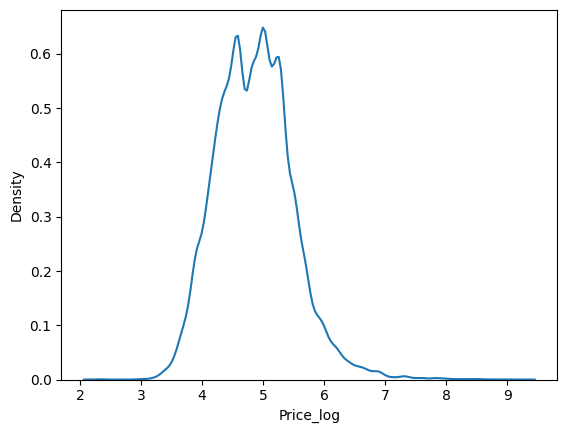

In [ ]:
sns.kdeplot(data=df,x='Price_log')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Price_log'>

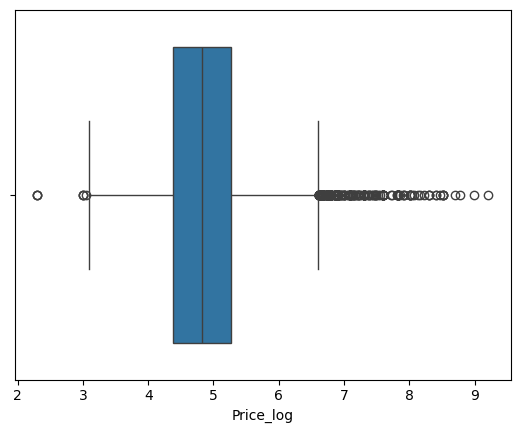

In [ ]:
sns.boxplot(data=df,x='Price_log')

In [ ]:
df['Price_log'].describe()

,Price_log
count,30478.000000
mean,4.860495
std,0.627704
min,2.302585
25%,4.382027
50%,4.828314
75%,5.273000
max,9.210340


5

<Axes: xlabel='Beds', ylabel='Price_log'>

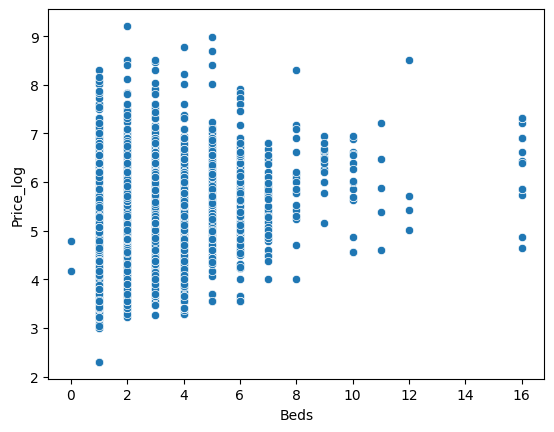

In [ ]:
sns.scatterplot( data=df, x='Beds', y='Price_log')

In [ ]:
df.loc[:,['Beds','Price']].groupby('Beds').describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

The price for the most part increases as the amount of beds increases, but there are a few instances where it does not like from 5 to 7 beds and 9 to 11 beds. This is likely due to the outlier properties that have massive prices. The standard deviation has the same phenomenon of generally increasing with the amount of beds, with exceptions.

**6**

<Axes: xlabel='Beds', ylabel='Price_log'>

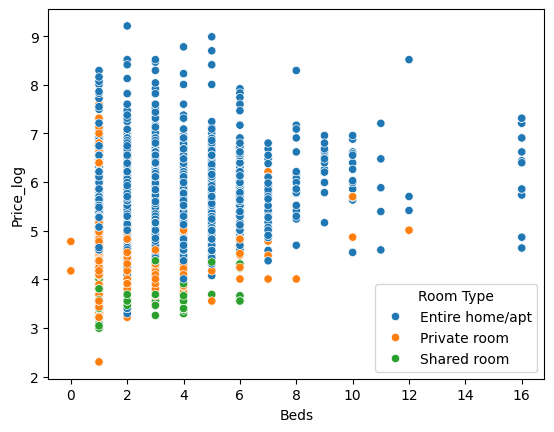

In [ ]:
sns.scatterplot(data=df,x='Beds',y='Price_log',hue='Room Type')

In [ ]:
var = 'Price'
group = 'Room Type'
df.loc[:,[group,var]].groupby(group).describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

The points for the shared and private rooms are closer to the bottom of the data, while the entire home / apartment data points are more in the middle and top, meaning the former are generally the cheapest per bed and the latter are more expensive per bed.  The entire room / apartment category has both the highest average price and the highest standard deviation, the latter of which indicates significant variation in entire home / apartment prices. For the case of the entire home / apartments, the mean price is 220.80, but there is a high range of prices, which means the mean might be skewed by a few very expensive properties. Therefore, the median is probably a better reflection of central tendency. The same phenomenon appears to be there for the private and shared rooms too.

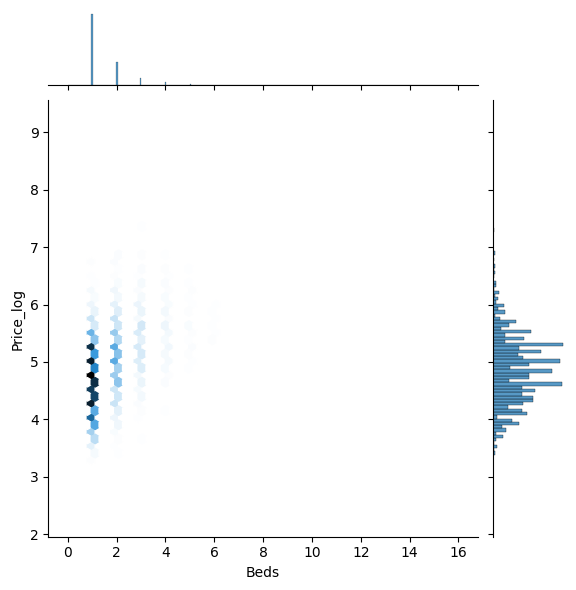

In [ ]:
sns.jointplot(data=df,x='Beds',y='Price_log',kind='hex')

The majority of the properties are 1 or 2 beds, but there are still some 3 and 4 bed properties. There are barely any properties with a bedcount of over that. The majority of properties are also within the price range of 2.5 to 6 log points. This makes me realize that the outliers may look particularly notable, but most properties are within the aforementioned bounds.

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

**1.** Medicare Physician & Other Practitioners - by Provider

**2.**

The data dictionary has definitions of variables and describes specific cases of missing data, particularly through suppression rules to protect privacy (e.g., suppressing values for fewer than 11 beneficiaries). For categorical variables, it explains when fields may be blank, such as missing names for organizations, and lists possible values (e.g., entity types and participation indicators). Numeric variables mention privacy driven suppression but lack explicit handling instructions for other types of missing values (e.g., NULL or 0). The dictionary is pretty well organized but could improve clarity on missing value representation for numeric fields.

**3**

In [2]:
df = pd.read_csv('MUP_PHY_R24_P07_V10_D22_Prov.csv')

<ipython-input-2-0b7772133e33>:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MUP_PHY_R24_P07_V10_D22_Prov.csv')


In [3]:
df.head()

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,...,Bene_CC_PH_Diabetes_V2_Pct,Bene_CC_PH_HF_NonIHD_V2_Pct,Bene_CC_PH_Hyperlipidemia_V2_Pct,Bene_CC_PH_Hypertension_V2_Pct,Bene_CC_PH_IschemicHeart_V2_Pct,Bene_CC_PH_Osteoporosis_V2_Pct,Bene_CC_PH_Parkinson_V2_Pct,Bene_CC_PH_Arthritis_V2_Pct,Bene_CC_PH_Stroke_TIA_V2_Pct,Bene_Avg_Risk_Scre
0,1003000126,Enkeshafi,Ardalan,NaN,M.D.,M,I,6410 Rockledge Dr Ste 304,NaN,Bethesda,...,50.0,48.0,75.0,75.0,51.0,13.0,5.0,53.0,30.0,2.5578
1,1003000134,Cibull,Thomas,L,M.D.,M,I,2650 Ridge Ave,Evanston Hospital,Evanston,...,22.0,11.0,74.0,62.0,20.0,16.0,2.0,42.0,6.0,1.0960
2,1003000142,Khalil,Rashid,NaN,M.D.,M,I,4126 N Holland Sylvania Rd,Suite 220,Toledo,...,43.0,22.0,68.0,75.0,31.0,15.0,NaN,75.0,8.0,1.5455
3,1003000423,Velotta,Jennifer,A,M.D.,F,I,11100 Euclid Ave,NaN,Cleveland,...,NaN,NaN,66.0,66.0,NaN,22.0,0.0,41.0,NaN,0.8531
4,1003000480,Rothchild,Kevin,B,MD,M,I,12605 E 16th Ave,NaN,Aurora,...,32.0,17.0,67.0,71.0,26.0,15.0,NaN,64.0,NaN,1.7034


In [4]:
# explore the column names and some summary statistics
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230293 entries, 0 to 1230292
Data columns (total 82 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   Rndrng_NPI                        1230293 non-null  int64  
 1   Rndrng_Prvdr_Last_Org_Name        1230293 non-null  object 
 2   Rndrng_Prvdr_First_Name           1165648 non-null  object 
 3   Rndrng_Prvdr_MI                   780696 non-null   object 
 4   Rndrng_Prvdr_Crdntls              1073919 non-null  object 
 5   Rndrng_Prvdr_Gndr                 1165649 non-null  object 
 6   Rndrng_Prvdr_Ent_Cd               1230293 non-null  object 
 7   Rndrng_Prvdr_St1                  1230292 non-null  object 
 8   Rndrng_Prvdr_St2                  280330 non-null   object 
 9   Rndrng_Prvdr_City                 1230293 non-null  object 
 10  Rndrng_Prvdr_State_Abrvtn         1230293 non-null  object 
 11  Rndrng_Prvdr_State_FIPS           123

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,...,Bene_CC_PH_Diabetes_V2_Pct,Bene_CC_PH_HF_NonIHD_V2_Pct,Bene_CC_PH_Hyperlipidemia_V2_Pct,Bene_CC_PH_Hypertension_V2_Pct,Bene_CC_PH_IschemicHeart_V2_Pct,Bene_CC_PH_Osteoporosis_V2_Pct,Bene_CC_PH_Parkinson_V2_Pct,Bene_CC_PH_Arthritis_V2_Pct,Bene_CC_PH_Stroke_TIA_V2_Pct,Bene_Avg_Risk_Scre
count,1.230293e+06,1230293,1165648,780696,1073919,1165649,1230293,1230292,280330,1230293,...,1.032170e+06,885778.000000,1.170092e+06,1.174713e+06,987829.000000,859027.000000,473142.000000,1.112548e+06,749616.000000,1.230293e+06
unique,NaN,294376,82081,32,18204,2,2,427550,59993,12948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,Michael,M,MD,M,I,200 1st St Sw,Suite 200,New York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6455,20780,94301,255517,593797,1165649,4287,8240,16701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.499740e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.567308e+01,24.411821,7.047816e+01,7.100946e+01,32.791202,16.161454,2.370147,5.131287e+01,13.805535,1.534877e+00
std,2.878861e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.278960e+01,15.679252,7.541127e+00,7.128752e+00,13.979786,6.868300,4.593121,1.255996e+01,10.783497,7.719833e-01
min,1.003000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,3.098000e-01
25%,1.245904e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.700000e+01,12.000000,6.800000e+01,6.900000e+01,23.000000,12.000000,0.000000,4.300000e+01,7.000000,1.003700e+00
50%,1.497971e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.400000e+01,20.000000,7.500000e+01,7.500000e+01,30.000000,15.000000,0.000000,5.000000e+01,11.000000,1.313300e+00
75%,1.740946e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.300000e+01,35.000000,7.500000e+01,7.500000e+01,41.000000,19.000000,4.000000,5.900000e+01,19.000000,1.877300e+00


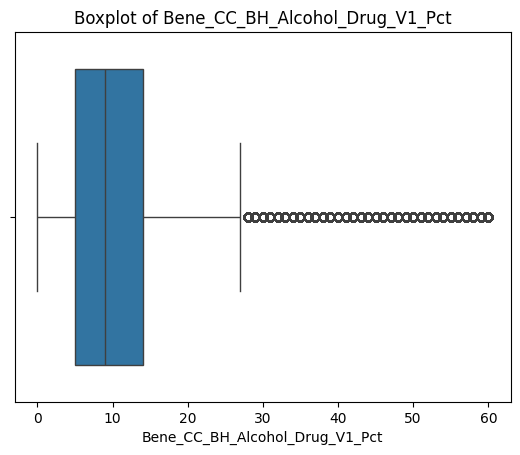

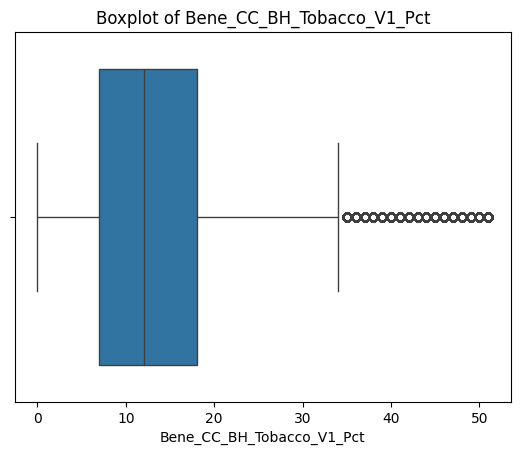

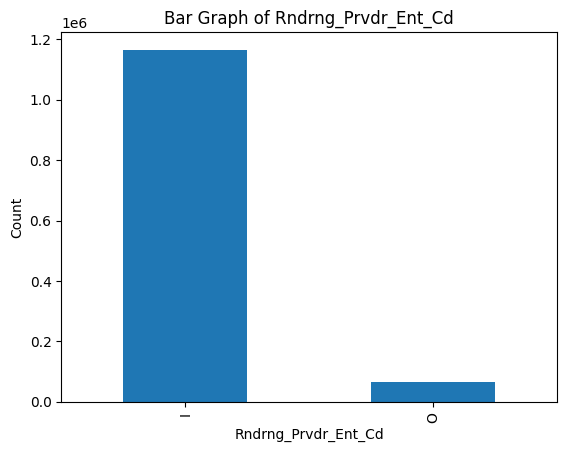

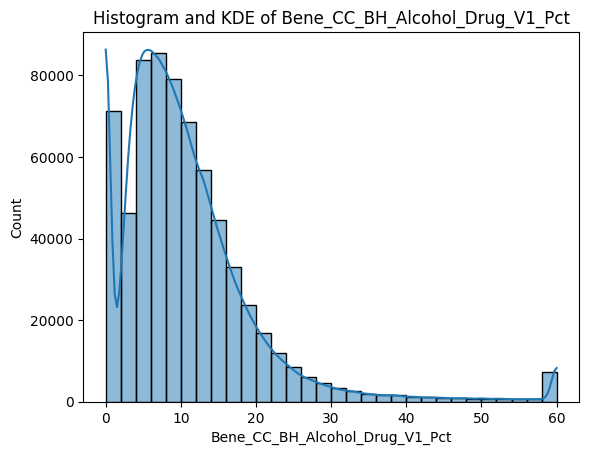

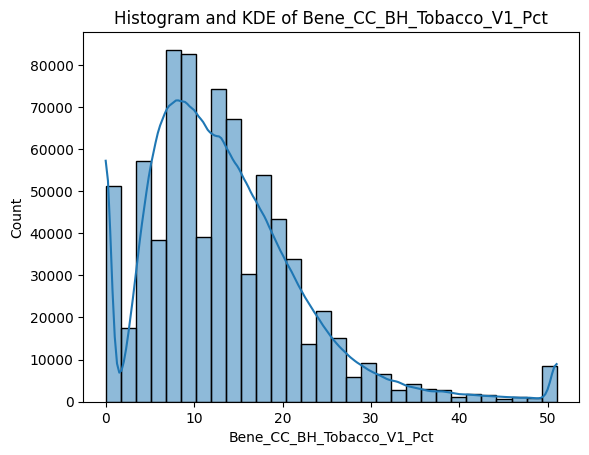

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


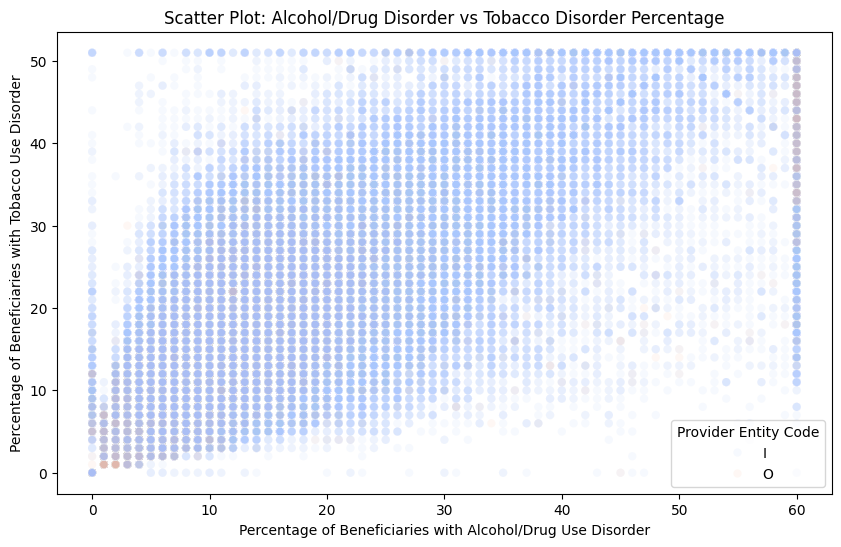

       Bene_CC_BH_Alcohol_Drug_V1_Pct  Bene_CC_BH_Tobacco_V1_Pct
count                   665711.000000              773772.000000
mean                        10.561735                  13.400786
std                          9.545494                   9.114608
min                          0.000000                   0.000000
25%                          5.000000                   7.000000
50%                          9.000000                  12.000000
75%                         14.000000                  18.000000
max                         60.000000                  51.000000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#3.
# Numeric variables - I chose these two because they represent the percentage of
# beneficiaries who with drug/alcohol use disorders and percentage who have
# tobacco use disorders. I find this interesting and wonder what the relationship
# between the two is
numeric_vars = ['Bene_CC_BH_Alcohol_Drug_V1_Pct', 'Bene_CC_BH_Tobacco_V1_Pct']

# Categorical variable - I chose this because it represents whether the medical
# provider is an individual or an organization, which also might be interesting to
# explore with regards to whether there are more individual or organization providers
# and if there's a relationship between what kind of provider and alcohol/drug/tobacco
# disordered patients
categorical_vars = ['Rndrng_Prvdr_Ent_Cd']

# Replace special symbols with NaN for proper numeric processing
df.replace({'*': pd.NA, '#': pd.NA}, inplace=True)

# Drop duplicate rows based on provider ID (Rndrng_NPI)
df.drop_duplicates(subset=['Rndrng_NPI'], inplace=True)


# Cap extreme outliers at the 99th percentile
for var in numeric_vars:
    upper_limit = df[var].quantile(0.99)
    df[var] = df[var].clip(upper=upper_limit)


# 4.
for var in numeric_vars:
    plt.figure()
    sns.boxplot(data=df, x=var)
    plt.title(f'Boxplot of {var}')
    plt.show()
# There are many outliers in both boxplots due to the amount of data in the dataset

# 4.
for var in categorical_vars:
    plt.figure()
    df[var].value_counts().plot(kind='bar')
    plt.title(f'Bar Graph of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

# 5
for var in numeric_vars:
    plt.figure()
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Histogram and KDE of {var}')
    plt.show()

# I could do a log transformation here as the data is slightly right-skewed,
# but I can visualize the relationship between the two plots well enough

# 6. FIgured out to reduce the alpha to show relationship using chatgpt
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Bene_CC_BH_Alcohol_Drug_V1_Pct',
    y='Bene_CC_BH_Tobacco_V1_Pct',
    hue='Rndrng_Prvdr_Ent_Cd',
    palette='coolwarm',
    alpha=0.1  # Adjust transparency to reduce overplotting
)
plt.title('Scatter Plot: Alcohol/Drug Disorder vs Tobacco Disorder Percentage')
plt.xlabel('Percentage of Beneficiaries with Alcohol/Drug Use Disorder')
plt.ylabel('Percentage of Beneficiaries with Tobacco Use Disorder')
plt.legend(title='Provider Entity Code')
plt.show()
# There is a direct relationship between the percentage of alcohol/drug disorder patients
# and the percentage of tobacco disorder patients. This could mean that people with
# one of these disorder groups are more likely to suffer from the other disorder

# 7.
summary_table = df[numeric_vars].describe()
print(summary_table)
# The mean for both variables is higher than the median (10.68% vs. 9% for alcohol/drug
# use and 13.52% vs. 12% for tobacco use), indicating a right skewed distribution caused
# by outliers. While most provider report smaller percentages,
# a few have very high rates, inflating the mean. The mean and median are relatively
# similar between the two variables.